In [1]:
%reload_ext autoreload
%autoreload 2

import os
from pathlib import Path

os.chdir(Path(os.getcwd()).parents[1])
print(os.getcwd())

/Users/davidspector/Home/Stanford/QuantUS Projects/TTC-CLI


In [2]:
from src.entrypoints import scan_loading_step, seg_loading_step, analysis_step

In [3]:
scan_type = 'nifti'

scan_path = '/Volumes/TOSHIBA EXT/Animal Data/Molecular/m907/20150410121501.008 KDR.nii.gz'

In [4]:
image_data = scan_loading_step(scan_type, scan_path)

In [5]:
image_data.pixdim

(np.float32(0.16378172), np.float32(0.07942695), np.float32(0.20588303))

In [6]:
seg_type = 'nifti_voi'

seg_path = '/Volumes/TOSHIBA EXT/Animal Data/Molecular/m907/nifti_segmentation_QUANTUS/20150410121501.008_KDR_segmentation.nii.gz'

In [7]:
seg_data = seg_loading_step(seg_type, image_data, seg_path, scan_path)

In [8]:
image_data.intensities_for_analysis.shape, seg_data.seg_mask.shape

((192, 391, 219, 414), (192, 391, 219))

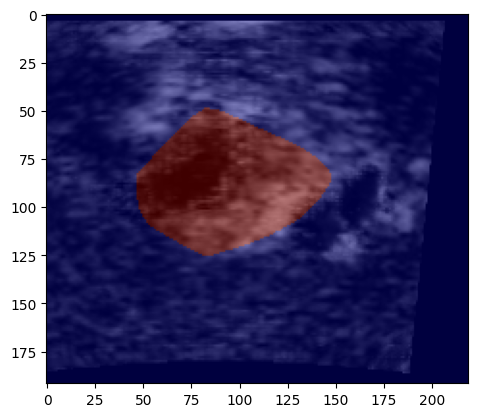

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(image_data.intensities_for_analysis[:, 250, :, 100], cmap='gray')
plt.imshow(seg_data.seg_mask[:, 250, :], cmap='jet', alpha=0.5)


In [11]:
analysis_type = 'ttc_curves'
analysis_funcs = ['pyradiomics']
analysis_kwargs = {
    'pyradiomics_config_path': '/Users/davidspector/Home/Stanford/QuantUS Projects/TTC-CLI/configs/pyradiomics/moderate.yml'
}

analysis_obj = analysis_step(analysis_type, image_data, seg_data, analysis_funcs=analysis_funcs, **analysis_kwargs)

Computing curves:   0%|          | 0/414 [00:00<?, ?it/s]

prepping images...
extracting features...


Computing curves:   0%|          | 1/414 [00:03<24:36,  3.57s/it]

organizing features...
done extracting features.
prepping images...
extracting features...


Computing curves:   0%|          | 2/414 [00:06<23:31,  3.43s/it]

organizing features...
done extracting features.
prepping images...
extracting features...


Computing curves:   1%|          | 3/414 [00:10<24:21,  3.56s/it]

organizing features...
done extracting features.
prepping images...
extracting features...


Computing curves:   1%|          | 4/414 [00:14<24:18,  3.56s/it]

organizing features...
done extracting features.
prepping images...
extracting features...


Computing curves:   1%|          | 5/414 [00:18<25:23,  3.73s/it]

organizing features...
done extracting features.
prepping images...
extracting features...


Computing curves:   1%|▏         | 6/414 [00:21<25:23,  3.73s/it]

organizing features...
done extracting features.
prepping images...
extracting features...


Computing curves:   1%|▏         | 6/414 [00:25<28:29,  4.19s/it]


KeyboardInterrupt: 